# Video Game Sales 电子游戏销售分析

   本次作业对Video Game Saless数据集进行分析，该数据集包含游戏名称、类型、发行时间、发布者以及在全球各地的销售额数据。根据该数据集，下面对电子游戏市场进行分析，并预测电子游戏的销售额

一、首先导入数据集，观察数据字段及属性：

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyecharts

In [2]:
data=pd.read_csv('./dataset/vgsales.csv')   #导入数据
data.info()   #查看数据字段信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


   根据上述结果，可以看到数据集中包含有16598条数据，共有11个属性，其中发行年份和发行商存在数据缺失的情况。下面首先数据进行预处理，然后分别分析受欢迎的游戏、类型、发布平台、发行商情况

二、数据预处理
   由于发行年份Year和发行商Publisher这两个属性存在缺失值，因此我们首先对这两个属性进行缺失值处理
   根据已有的信息，我们无法推断出发行年份的值，如果采用数据填充的方法不太合理，因此，对于发行年份缺失的数据我们直接删除。
   而对于缺乏发行商属性的数据，由于只有58条，数量很少，我们也可以采用直接删除的方法。
   下面将缺少这两个属性的数据全部删除

In [3]:
df=data.dropna(subset=['Year'])  #删除Year列中存在缺失值的行
df=df.dropna(subset=['Publisher'])#删除Publisher列中存在缺失值的行
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


可以看到，处理完成后，数据集中不再有缺失值，我们对处理好的数据进行描述性统计分析，查看数据的基本情况

In [4]:
df.describe().T   #查看数据属性的情况

,count,mean,std,min,25%,50%,75%,max
Rank,16291.0,8290.190228,4792.654450,1.00,4132.50,8292.00,12439.50,16600.00
Year,16291.0,2006.405561,5.832412,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16291.0,0.265647,0.822432,0.00,0.00,0.08,0.24,41.49
EU_Sales,16291.0,0.147731,0.509303,0.00,0.00,0.02,0.11,29.02
JP_Sales,16291.0,0.078833,0.311879,0.00,0.00,0.00,0.04,10.22
Other_Sales,16291.0,0.048426,0.190083,0.00,0.00,0.01,0.04,10.57
Global_Sales,16291.0,0.540910,1.567345,0.01,0.06,0.17,0.48,82.74


In [5]:
df.describe(include='object').T

,count,unique,top,freq
Name,16291,11325,Need for Speed: Most Wanted,12
Platform,16291,31,DS,2131
Genre,16291,12,Action,3251
Publisher,16291,576,Electronic Arts,1339


    根据上述的描述性统计分析，我们可以看到，该数据集包含有从1980年到2020年的游戏销售信息，其中共涉及到11325个游戏，576个发行商，12种游戏类型和31个游戏平台。发行商中Electronic Arts发行数量最多，发行了1339个游戏；DS平台的游戏数量最多，共有2131个；Action类型的游戏数量最多，共有3251个

三、数据分析
   数据预处理完成后，下面进一步对数据进行分析。

1、分析1980年以来最受玩家欢迎的十款游戏。

In [6]:
df_name=df[['Name','Global_Sales','Year','Genre']].sort_values(by='Global_Sales' , ascending=False).head(10)
df_name   #查看最受玩家欢迎的十款游戏

,Name,Global_Sales,Year,Genre
0,Wii Sports,82.74,2006.0,Sports
1,Super Mario Bros.,40.24,1985.0,Platform
2,Mario Kart Wii,35.82,2008.0,Racing
3,Wii Sports Resort,33.00,2009.0,Sports
4,Pokemon Red/Pokemon Blue,31.37,1996.0,Role-Playing
5,Tetris,30.26,1989.0,Puzzle
6,New Super Mario Bros.,30.01,2006.0,Platform
7,Wii Play,29.02,2006.0,Misc
8,New Super Mario Bros. Wii,28.62,2009.0,Platform
9,Duck Hunt,28.31,1984.0,Shooter


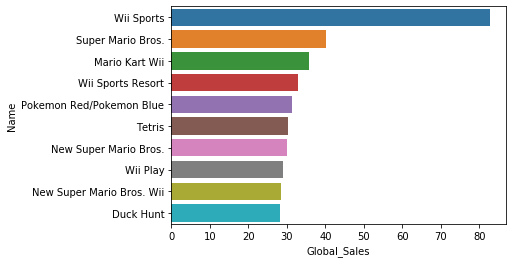

In [7]:
#对数据进行可视化展示
sns.barplot(x='Global_Sales',y='Name',data=df_name)

    根据上述结果，可以看出：自1980年以来，销售量最大的十款游戏为：Wii Sports、Super Mario Bros.、Mario Kart Wii、Wii Sports Resort、Pokemon Red/Pokemon Blue、Tetris、New Super Mario Bros.、Wii Play、New Super Mario Bros. Wii、Duck Hunt。其中在2006年发行的运动类游戏Wii Sports是有史以来最受玩家喜爱的游戏，销售额远超第二名Super Mario Bros.

2、下面分析用户长久以来喜爱的游戏类型，然后分析近五年来用户喜爱的游戏类型是否发生改变，并以可视化形式展示结果

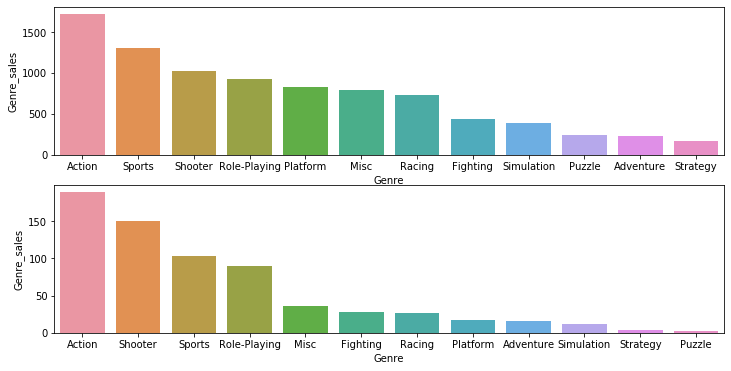

In [8]:
FGE=pd.pivot_table(df,index='Year',columns='Genre',values='Global_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
FGE=pd.DataFrame(data=FGE,columns={'Genre_sales'})
FGE_near5=pd.pivot_table(df,index='Year',columns='Genre',values='Global_Sales',aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
FGE_near5=pd.DataFrame(data=FGE_near5,columns={'Genre_sales'})
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,6))
sns.barplot(x=FGE.index,y='Genre_sales',data=FGE,ax=ax1)
sns.barplot(x=FGE_near5.index,y='Genre_sales',data=FGE_near5,ax=ax2)

    根据上述可视化结果，可以看出：
    （1）近五年来，用户最喜爱的游戏类型依然是动作类；
    （2）运动类和射击类排在用户喜爱的游戏类型的第二三位，但近五年来射击类游戏反超了运动类居第二位
    （3）角色扮演类游戏一直是用户第四喜爱的游戏类型
    （4）平台类游戏近五年内销售量大大减少
    （5）冒险类游戏的份额有所上升，而悬疑类游戏的份额大降

3、下面分析用户常用的平台，然后分析近五年来用户常用的平台是否发生变化，并以可视化形式展示结果

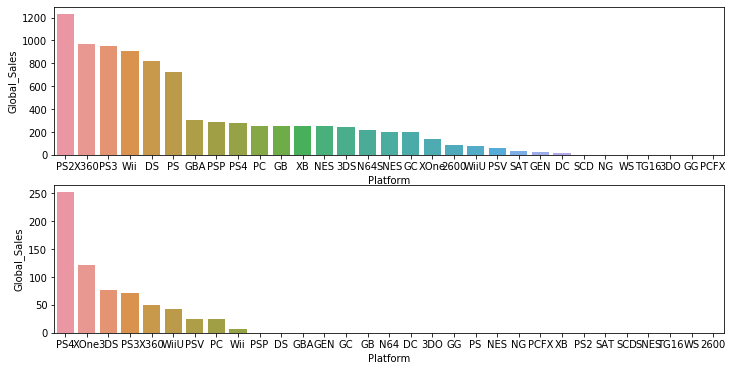

In [9]:
FPF=pd.pivot_table(df,index='Year',columns='Platform',values='Global_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
FPF=pd.DataFrame(data=FPF,columns={'Global_Sales'})
FPF_near5=pd.pivot_table(df,index='Year',columns='Platform',values='Global_Sales',aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
FPF_near5=pd.DataFrame(data=FPF_near5,columns={'Global_Sales'})
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,6))
sns.barplot(x=FPF.index,y='Global_Sales',data=FPF,ax=ax1)
sns.barplot(x=FPF_near5.index,y='Global_Sales',data=FPF_near5,ax=ax2)

    根据上述可视化结果，可以看出：
    （1）总体上来说，随着技术进步，一些不支持最新游戏的老版平台都被慢慢淘汰了；
    （2）目前的市场上，PS4独占鳌头，占据了大部分的市场，X360和PS3还占有少量市场，而之前的PS2、DS、Wii已经基本淘汰了。

4、下面分析各发行商的销售情况以及近年来的总体变化

In [10]:
PBL=pd.pivot_table(data=df,index='Publisher',values='Global_Sales',aggfunc=np.sum)
PBL=PBL.sort_values(by='Global_Sales',ascending=False)
PBL_near5=df[df['Year']>2013]
PBL_near5=pd.pivot_table(data=PBL_near5,index='Publisher',values='Global_Sales',aggfunc=np.sum)
PBL_near5=PBL_near5.sort_values(by='Global_Sales',ascending=False)
from pyecharts import Pie
pie = Pie("发行商饼状图", "长短期对比分析",title_pos='right',width=900,height=300)
pie.add("长期", PBL.head().index, PBL.head().values ,center=[25,50],is_legend_show=False,is_label_show=True)
pie.add("短期", PBL_near5.head().index, PBL_near5.head().values ,center=[75,50],is_legend_show=False,is_label_show=True)
#保存图表
pie

    根据上述可视化结果，可以看出：
    （1）索尼近年来乏力，已经跌出市场份额的前五名；
    （2）任天堂的市场份额从第一跌至第三，但依然占据20.82%的市场，但可以看出呈现下降趋势
    （3）EA的市场份额有所上升，成为近年来市场占比最多的发行商
    （4）Activision动视和Ubisoft育碧的市场份额上升最多，分别跃至第二、四位
    （5）TTWO是近年来的新秀发行商，占据了当前市场的12.67%

5、最后我们分析下游戏市场的总体销售发展趋势

Text(0.5, 1.0, '五大市场发展趋势')

D:\python\anaconda\envs\DataMing\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\python\anaconda\envs\DataMing\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\python\anaconda\envs\DataMing\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\python\anaconda\envs\DataMing\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\python\anaconda\envs\DataMing\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\python\anaconda\envs\DataMing\lib\site-packages\matplotlib\backends\backend_agg.py

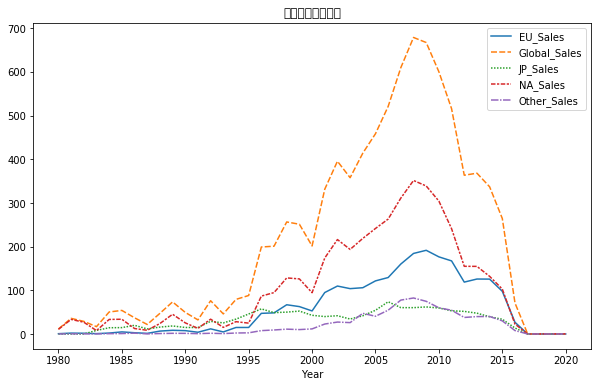

In [11]:
M=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
#绘制各地区销量走势图
df5market_p=pd.pivot_table(df,index='Year',values=M,aggfunc=np.sum)
fig=plt.figure(figsize=(10,6))
sns.lineplot(data=df5market_p)
plt.title('五大市场发展趋势')

    根据上述可视化结果，可以看出：
    （1）游戏的销量从1995年开始暴涨
    （2）在2005年到2010年之间，游戏的销量数据到达顶峰，这也与我们之前的分析符合，销量最高的十款游戏大部分是在该段时间内发行的
    （3）从15年以后，游戏的销量开始暴跌

四、预测每年电子游戏销售额
   我们根据目前已知的历年电子游戏销售额来预测接下来的电子游戏销售额

In [12]:
df.groupby('Year').count()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
1980.0,9,9,9,9,9,9,9,9,9,9
1981.0,46,46,46,46,46,46,46,46,46,46
1982.0,36,36,36,36,36,36,36,36,36,36
1983.0,17,17,17,17,17,17,17,17,17,17
1984.0,14,14,14,14,14,14,14,14,14,14
1985.0,14,14,14,14,14,14,14,14,14,14
1986.0,21,21,21,21,21,21,21,21,21,21
1987.0,16,16,16,16,16,16,16,16,16,16
1988.0,15,15,15,15,15,15,15,15,15,15


可以发现，在数据中2017年和2020年的数据量很少，并且不连续，为了提高预测的精度，我们去掉这两年的数据再进行预测

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
sales = df[df['Year'] <= 2016.0]
sale_for_years = sales.groupby('Year', as_index = False).sum()
x = sale_for_years['Year'].values.reshape(-1, 1)
y = sale_for_years['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state = 1)

LR = LinearRegression()
LR.fit(X_train, y_train)
LR_score_train = LR.score(X_train, y_train)
print('LR Training score: ',LR_score_train)
LR_score_test = LR.score(X_test, y_test)
print('LR Testing score: ',LR_score_test)

LR Training score:  0.5718617276878595
LR Testing score:  0.6109891110454571


五、可视化应用--综合分析
   根据上述分析，可以看出在接下来的几年内，电子游戏的销售量还会进一步下降，那么作为商家应该如何去推出新游戏，仅凭上述的分析展示还不够全面，下面我们对数据进行进一步分析。

    1、下面我们来分析一下各个市场历年的销量变化

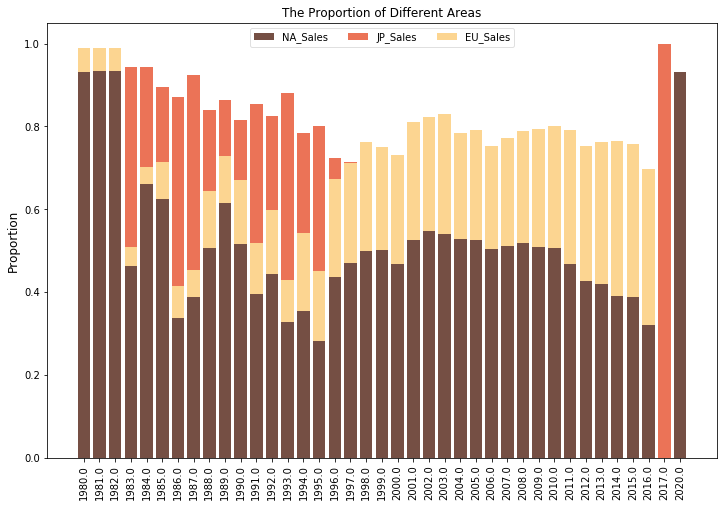

In [14]:
#按年汇总各地数据
data=df.pivot_table(index='Year',
                    values=['JP_Sales','EU_Sales',
                    'NA_Sales','Global_Sales'],
                    aggfunc=np.sum)
#计算比例          
data['NA_prop']=data['NA_Sales']/data['Global_Sales']
data['JP_prop']=data['JP_Sales']/data['Global_Sales']
data['EU_prop']=data['EU_Sales']/data['Global_Sales']

f,ax=plt.subplots(figsize=(12,8))
index=np.arange(len(data))
minColor = (117/256,79/256,68/256) 
midColor = (236/256,115/256,87/256)
maxColor = (253/256,214/256,146/256)

plt.bar(index,data.NA_prop,color=minColor)
plt.bar(
        index,data.JP_prop,
        bottom=data.NA_prop, #通过bottom来设置这个柱子距离底部的高度
        color=midColor
        )
plt.bar(
        index,data.EU_prop,
        bottom=data.NA_prop, #通过bottom来设置这个柱子距离底部的高度
        color=maxColor
        )
font={
    'family':'DejaVu Sans',
    'weight':'normal',
    'size':12
}
plt.xticks(index,data.index,rotation=90)
plt.title('The Proportion of Different Areas',font)
plt.ylabel('Proportion',font)
plt.legend(['NA_Sales','JP_Sales','EU_Sales'],loc='upper center',ncol=3,framealpha=0.6)
plt.show()

    可以看到，全球电子游戏的主要市场来自于美国地区，在1983-1995年，日本地区的游戏销量占比很大，随后就突然下降，而近些年来，可以看到，尽管美国地区的销量依然占比很高，但欧洲地区的游戏销量占比逐渐上升，甚至呈反超趋势

2、接下来，我们分析各个市场喜爱的游戏类型

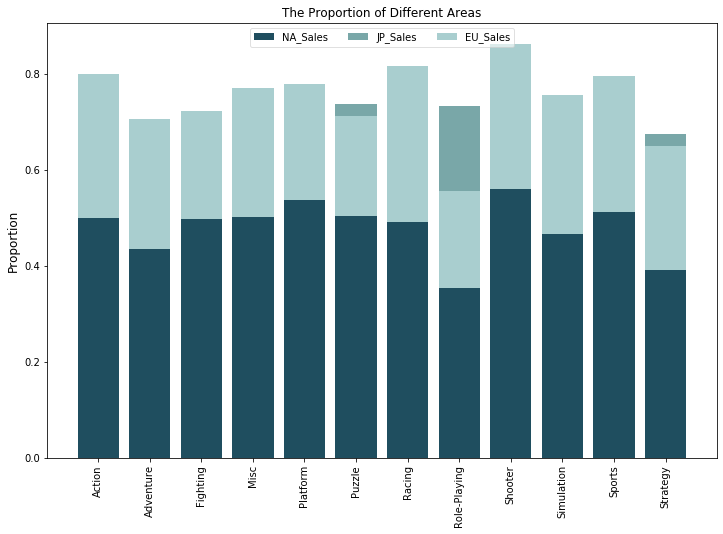

In [15]:
data=df.pivot_table(index='Genre',
                    values=['JP_Sales','EU_Sales',
                    'NA_Sales','Global_Sales'],
                    aggfunc=np.sum,)

data['NA_prop']=data['NA_Sales']/data['Global_Sales']
data['JP_prop']=data['JP_Sales']/data['Global_Sales']
data['EU_prop']=data['EU_Sales']/data['Global_Sales']

f,ax=plt.subplots(figsize=(12,8))
index=np.arange(len(data))
minColor = (31/256,78/256,95/256)   
midColor = (121/256,168/256,169/256)  
maxColor = (170/256,207/256,208/256) 

#绘制堆积柱形图
plt.bar(index,data.NA_prop,color=minColor)
plt.bar(
        index,data.JP_prop,
        bottom=data.NA_prop, 
        color=midColor
        )
plt.bar(
        index,data.EU_prop,
        bottom=data.NA_prop, 
        color=maxColor
        )
font={
    'family':'DejaVu Sans',
    'weight':'normal',
    'size':12
}
plt.xticks(index,data.index,rotation=90)
plt.title('The Proportion of Different Areas',font)
plt.ylabel('Proportion',font)
plt.legend(['NA_Sales','JP_Sales','EU_Sales'],
loc='upper center',ncol=3,framealpha=0.6)
plt.show()


    可以看到，美国市场作为主要市场，在各类游戏中市场占比都是最多的，因此在推出新游戏的时候，美国市场是不可或缺的，而日本钟情于角色扮演类游戏，应该在推出该类游戏时首要应该先考虑日本市场。

3、接下来我们考虑各个市场喜爱的游戏类型

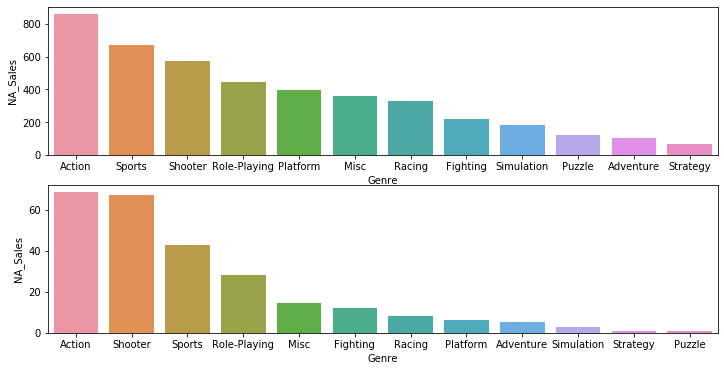

In [16]:
#美国喜爱的游戏类型
FGE_NA=pd.pivot_table(df,index='Year',columns='Genre',values='NA_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
FGE_NA=pd.DataFrame(data=FGE_NA,columns={'NA_Sales'})
FGE_NA_near5=pd.pivot_table(df,index='Year',columns='Genre',values='NA_Sales',aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
FGE_NA_near5=pd.DataFrame(data=FGE_NA_near5,columns={'NA_Sales'})
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,6))
sns.barplot(x=FGE.index,y='NA_Sales',data=FGE_NA,ax=ax1)
sns.barplot(x=FGE_near5.index,y='NA_Sales',data=FGE_NA_near5,ax=ax2)

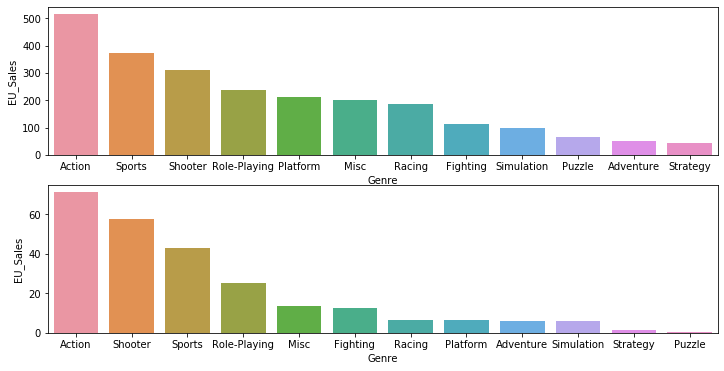

In [17]:
#欧洲喜爱的游戏类型
FGE_EU=pd.pivot_table(df,index='Year',columns='Genre',values='EU_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
FGE_EU=pd.DataFrame(data=FGE_EU,columns={'EU_Sales'})
FGE_EU_near5=pd.pivot_table(df,index='Year',columns='Genre',values='EU_Sales',aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
FGE_EU_near5=pd.DataFrame(data=FGE_EU_near5,columns={'EU_Sales'})
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,6))
sns.barplot(x=FGE.index,y='EU_Sales',data=FGE_EU,ax=ax1)
sns.barplot(x=FGE_near5.index,y='EU_Sales',data=FGE_EU_near5,ax=ax2)

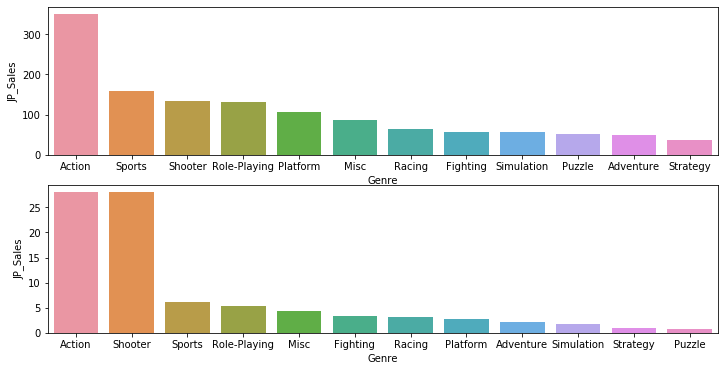

In [18]:
#日本喜爱的游戏类型
FGE_JP=pd.pivot_table(df,index='Year',columns='Genre',values='JP_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
FGE_JP=pd.DataFrame(data=FGE_JP,columns={'JP_Sales'})
FGE_JP_near5=pd.pivot_table(df,index='Year',columns='Genre',values='JP_Sales',aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
FGE_JP_near5=pd.DataFrame(data=FGE_JP_near5,columns={'JP_Sales'})
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,6))
sns.barplot(x=FGE.index,y='JP_Sales',data=FGE_JP,ax=ax1)
sns.barplot(x=FGE_near5.index,y='JP_Sales',data=FGE_JP_near5,ax=ax2)


    可以看出，各个市场的游戏偏好总体差不多，都是动作类份额最多。
    因此在接下来游戏销量呈下滑趋势的情况下，各个发行商在发行新游戏时，应该多注重PS4和Xone平台上的动作类游戏，并以欧美市场作为主要市场，对于角色扮演类游戏，应当在日本市场投入更多的力度。